In [1]:
import sklearn
import numpy as np

In [2]:
filename = 'demonstrations/seb_run000'
dati = np.load(filename+'.npz')

In [3]:
obs_middle = np.array([15.0, 25.0, 0.0, 0.0, 0.0])
obs_radius = np.array([15.0, 25.0, np.pi, np.pi/2, np.pi])
observation = dati['obs']
print(observation.shape)
obs = (observation - obs_middle) / obs_radius
print(obs.shape)
out = {
    'actions': dati['actions'],
    'rewards': dati['rewards'],
    'episode_returns': dati['episode_returns'],
    'episode_starts': dati['episode_starts'],
    'obs': obs
}
#np.savez(filename+'.nrm.npz', **out)

(10650, 5)
(10650, 5)


In [4]:
#print(np.max(obs, axis=0))
#print(np.min(obs, axis=0))
print(np.std(obs, axis=0))
print(np.mean(obs, axis=0))
#print(np.median(obs, axis=0))
#print(0.5*(np.max(obs, axis=0)+np.min(obs, axis=0)))

[1.07950816 0.32774781 0.56151983 0.45920199 0.5105057 ]
[ 0.42666972 -0.16380214 -0.00956625  0.05407778  0.0180156 ]


In [5]:
obs = dati['obs']
acs = dati['actions']
rew = dati['rewards']
n = obs.shape[0] - 1
print(n)

10649


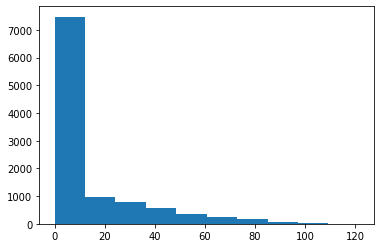

In [7]:
import matplotlib.pyplot as plt
plt.hist(rew)
plt.show()

In [13]:
X = np.hstack([obs[:-1], acs[:-1]])

In [14]:
y = np.zeros([n,6])
y[:,:-1] = obs[1:] - obs[:-1]
y[:,-1]  = rew[:-1]

In [15]:
#y = np.zeros([n,1])
#y[:,-1] = rew[:-1]

In [16]:
X = X[~dati['episode_starts'][1:]]
y = y[~dati['episode_starts'][1:]]

In [17]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y)

In [18]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
regr = MLPRegressor(hidden_layer_sizes=(256,256), 
                     activation='relu',
                     solver='adam', 
                     alpha=0.0001, 
                     batch_size='auto', 
                     learning_rate='invscaling', 
                     learning_rate_init=0.001, 
                     power_t=0.5, max_iter=1000, shuffle=True, 
                     tol=0.0001, verbose=True, 
                     warm_start=False, momentum=0.9, 
                     nesterovs_momentum=True, early_stopping=True, 
                     validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
                     epsilon=1e-08, n_iter_no_change=10, max_fun=15000,
                   )

In [13]:
regr = regr.fit(X_train, y_train)

Iteration 1, loss = 0.29731204
Validation score: 0.559733
Iteration 2, loss = 0.20665331
Validation score: 0.607766
Iteration 3, loss = 0.18546016
Validation score: 0.633959
Iteration 4, loss = 0.17335472
Validation score: 0.647481
Iteration 5, loss = 0.16347521
Validation score: 0.667034
Iteration 6, loss = 0.15523758
Validation score: 0.675506
Iteration 7, loss = 0.14876312
Validation score: 0.685968
Iteration 8, loss = 0.14999493
Validation score: 0.692199
Iteration 9, loss = 0.14012514
Validation score: 0.702173
Iteration 10, loss = 0.13554632
Validation score: 0.706871
Iteration 11, loss = 0.13048306
Validation score: 0.714614
Iteration 12, loss = 0.12673920
Validation score: 0.718790
Iteration 13, loss = 0.12463177
Validation score: 0.727617
Iteration 14, loss = 0.12109433
Validation score: 0.717806
Iteration 15, loss = 0.12095896
Validation score: 0.730823
Iteration 16, loss = 0.11715703
Validation score: 0.737319
Iteration 17, loss = 0.11339647
Validation score: 0.732497
Iterat

In [15]:
print(regr.score(X_test, y_test))
from sklearn.metrics import r2_score
X_test_noact = np.copy(X_test)
n_test = X_test.shape[0]
X_test_noact[:,-2:] = np.zeros([n_test, 2])

y_test_hat = regr.predict(X_test)
print(r2_score(y_test[:,3:5], y_test_hat[:,3:5]))
print(r2_score(y_test[:,-1], y_test_hat[:,-1]))
y_test_noact_hat = regr.predict(X_test_noact)
print(r2_score(y_test[:,3:5], y_test_noact_hat[:,3:5]))

0.8006171918299426
0.7217654561901865
0.9791239928774325
0.41294095567855027


32^2
0.7568775375158716
0.6618566505493315
0.3792859472529585

32^4
0.6790337384394276
0.3706717010875441

64^2
0.7890316324251868
0.695654767820375
0.4064780202314599

64^3
0.8050472956040292
0.7231935605209159
0.379271480435488

64x128x64
0.8017002731673505
0.7189430821483473
0.37180074395282325

128^2
0.8126686933062833
0.7375201987656768
0.40055354126739673

128^4
0.8104557255909789
0.7387669853417194
0.37929269607135496

256
0.7863730904575563
0.7091571089083142
0.3982262215382181

8x256
0.7668729199385614
0.6684689377923899
0.3910761956441275

256x128
0.8116519021776541
0.7413045875383611
0.36898949926441105

128x256
0.8166583345614731
0.7493261067038156
0.3717739442587401

256^2
0.8240627820769033
0.757434327159496
0.38575411601107523

256^3
0.8145780211741683
0.7332958111739403
0.3725881872520055

512
0.7917903198840671
0.7182124929605083
0.39966753727381105

512^2
0.8153211637061869
0.7443025983927569
0.38189329807387334


In [20]:
plt.hist([y_test_hat[:,-1], y_test[:,-1]])
plt.show()

NameError: name 'y_test_hat' is not defined

In [8]:
np.mean(rew)

12.063776888961495

In [21]:
np.mean(y[:,-1])

-6.558205083931056e-17